In [120]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
import seaborn as sns

Let's download the datasets

In [121]:
column_names_movies = ['Wiki_id', 'FB_id', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Country', 'Genres']
df_movies = pd.read_csv('MovieSummaries/MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_names_movies)

df_movies.head()

,Wiki_id,FB_id,Movie_name,Release_date,Revenue,Runtime,Languages,Country,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [122]:
column_names_characters = ['Wiki_id', 'FB_id', 'Date_of_release', 'Character_name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age_at_release', 'FB_character_map', 'jsp 1', 'jsp 2']
df_characters = pd.read_csv('MovieSummaries/MovieSummaries/character.metadata.tsv', sep='\t', header=None, names=column_names_characters)

df_characters.head()

,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


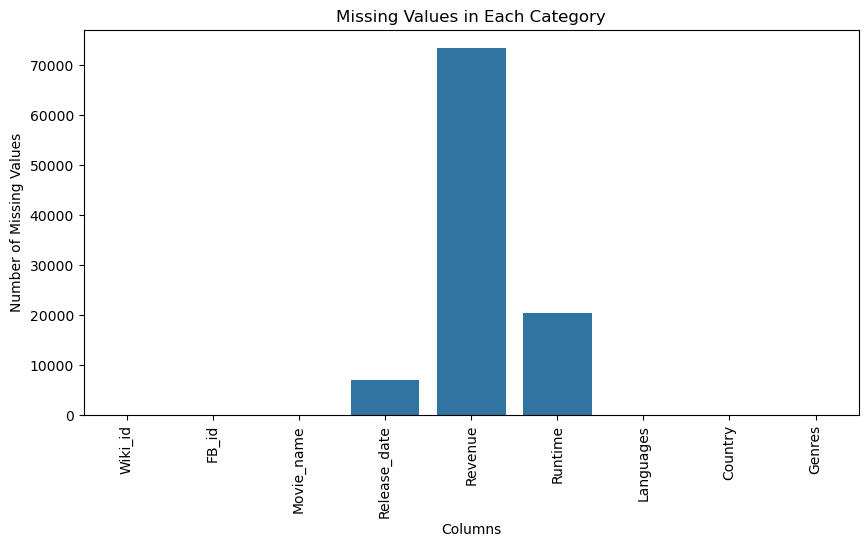

In [123]:
plt.figure(figsize=(10,5))
missing_values = df_movies.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category')
plt.show()

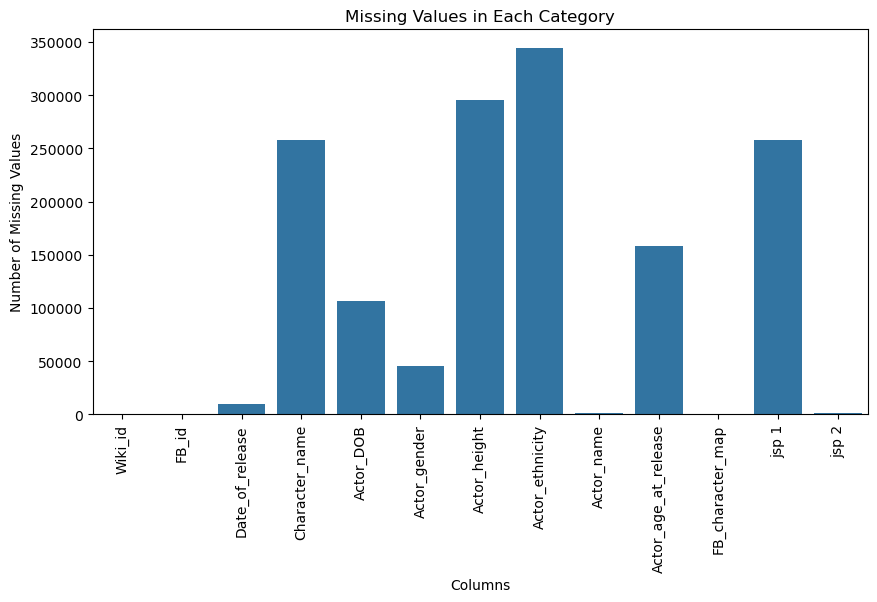

In [124]:
plt.figure(figsize=(10,5))
missing_values = df_characters.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category')
plt.show()

Now, we want to eliminate the common words in the names:

1. Let's eliminate the characters whose names are not documented.
2. Let's eliminate the common words using the spacy library.

(192794, 13)
(192794, 13)


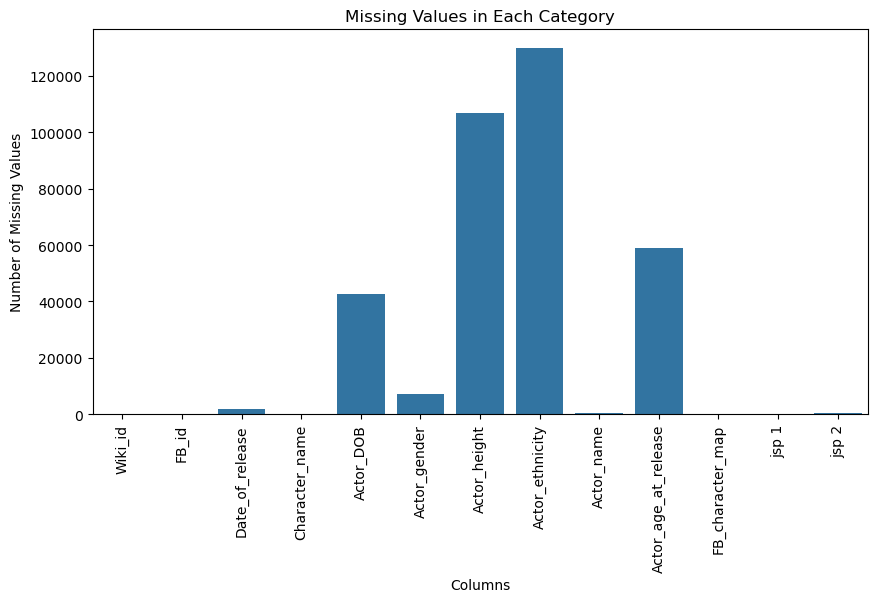

In [276]:
#1

print(df_characters.shape)
df_characters = df_characters.dropna(subset=['Character_name'])
print(df_characters.shape)

plt.figure(figsize=(10,5))
missing_values = df_characters.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category')
plt.show()

In [ ]:
import spacy

# Charger le modèle de langue anglaise
nlp = spacy.load("en_core_web_sm")

import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zacbo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
#2
# Liste des mots anglais
english_words = set(words.words())                                                        # Liste de 235892 mots anglais   
invalid_chars = ['-', '/', '.', ',',"'", '"', '#',"(",')','0','1','2','3','4','5','6','7','8','9']
def filter_non_english_names(name):
    words_in_name = name.split()                                                             # Sépare le nom en mots individuels
    filtered_words = [word for word in words_in_name if word.lower() not in english_words and all(char not in word for char in invalid_chars)]   # Filtre les mots qui ne sont pas dans la liste des mots anglais et ceux qui contiennent '-' ou '/'
    return ' '.join(filtered_words)                                                          # Recrée la chaîne de caractères avec les mots filtrés


# Exemple de texte
text = "General record chinese boyfriend store clerk Soldier tea olivier Camille"
result = filter_non_english_names(text)
print(result)

sample = df_characters.sample(150000)
sample.head()

235892
chinese boyfriend olivier Camille


,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
409557,20904382,/m/05b1slh,1979-09-14,Leelu,NaN,F,NaN,NaN,Manju Bansal-Asrani,NaN,/m/0k28zlv,/m/0k28zly,/m/0gc56vx
434674,1623960,/m/05hjnw,2005-12-09,Chilean Sheepherder #1,NaN,NaN,NaN,NaN,Victor Reyes,NaN,/m/0hhlhq_,/m/0hhlhr2,/m/0hhlhr9
7041,3990322,/m/0bbchn,1950-09-30,Amelia Morgan,1942-02-15,F,1.620,NaN,Sherry Jackson,8.0,/m/0k6h5bm,/m/0k6h5bq,/m/03_xd5
224987,1249014,/m/04m0gv,1962-03-09,Young Boy,1933-08-18,M,1.651,/m/03ts0c,Roman Polański,28.0,/m/0j_kfw,/m/0b3w28f,/m/06b_0
120664,29732423,/m/0cs4fpq,2002,Inspector Ritesh,1971-07-17,M,NaN,/m/0dryh9k,Ravi kishan,30.0,/m/0gw0z_b,/m/0h73tcm,/m/02852vp


In [438]:
#values_unfiltered = sample['Character_name'].value_counts()
#print(values_unfiltered)

In [439]:
sample_filtered = sample.copy()
sample_filtered['Character_name']=sample_filtered['Character_name'].apply(filter_non_english_names)
#sample_filtered.head()

In [431]:
#values_filtered = sample_filtered['Character_name'].value_counts()
#print(values_filtered)

In [432]:
deleted_names = sample[sample_filtered['Character_name']==values_filtered.index[0]]
print(deleted_names.shape)
deleted_names.head(50)
#print(values.index[0])

(263, 13)


,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
372584,20696236,/m/0522xw6,1931-06-03,Peggy Gay,1909-03-10,F,NaN,/m/07bch9,Muriel Angelus,22.0,/m/0kbkq58,/m/0kbs4qp,/m/02pys_z
11682,23292818,/m/065_37_,1982,Drummer,NaN,M,NaN,NaN,Michael Barsimanto,NaN,/m/0n1zxr6,/m/0n20yvc,/m/0n1zxr9
449582,2322291,/m/073qj2,2005-08-12,Morgan,NaN,M,NaN,NaN,David Wagner,NaN,/m/0cg_n_y,/m/0cg_p00,/m/0cg_p07
256617,6304360,/m/0g06hx,2006,Camilla,1966-09-02,F,1.570,/m/09k5jvk,Salma Hayek,39.0,/m/0jts4x,/m/0gxr2kw,/m/06x58
199809,32818732,/m/0h3qcj5,2012-05-23,Limousine,1960-11-22,M,NaN,NaN,Léos Carax,51.0,/m/0n5jmdc,/m/0n5jmdg,/m/07mb3r
353050,699336,/m/033t6r,1995-07-14,Baby in Toy Store,1994,F,NaN,NaN,Violet Columbus,1.0,/m/0h16f8d,/m/0h16f8g,/m/0byfrrm
401575,25080984,/m/09gq0x5,2010-11-26,Royal Nanny,NaN,F,NaN,NaN,Mary Robinson,NaN,/m/0b_srqf,/m/0g8kvth,/m/0b_srnp
286278,4762538,/m/0cl_v5,2000-02,Little Girl,NaN,NaN,NaN,NaN,Lisa Guez,NaN,/m/0by3x59,/m/0by3x1x,/m/0by3x1s
409322,448814,/m/029qy2,2000-09-19,Flounder,1957-11-06,M,NaN,NaN,Cam Clarke,42.0,/m/0dkdd5m,/m/0f5yz9,/m/01s9ftn
333843,5576958,/m/0dtf18,1972-11-20,Frog Footman,NaN,M,NaN,NaN,Ian Trigger,NaN,/m/0ck8btq,/m/0ck8btt,/m/0k51gp


In [433]:
kept_names = sample_filtered[sample_filtered['Character_name']!=values_filtered.index[0]]
kept_names.head(60)
#print(values.index[0])

,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
32376,28467582,/m/0crgtcj,NaN,Obijesni mladic,1946-07-27,M,1.910,/m/09vmyh,Rade Serbedzija,NaN,/m/0h34zvt,/m/0h34zvx,/m/034jgf
14803,20066135,/m/04yd_w6,1949-06-10,Thomas,1913-11-04,M,1.850,NaN,Gig Young,35.0,/m/052gryq,/m/0n5bd5w,/m/03bqwc
43617,33219990,/m/0h63mpx,2011-08-08,Alice,NaN,F,NaN,NaN,Sophie Nelisse,NaN,/m/0hlrmnq,/m/0hztl81,/m/0hlrmnf
301293,20015850,/m/04ycptv,2010,Barbara,1953-06-07,F,1.588,NaN,Colleen Camp,56.0,/m/052gjj4,/m/0g4fx26,/m/05fhcs
322480,234731,/m/01j3gd,1995-08-04,Madison,1959-01-31,F,1.753,NaN,Kelly Lynch,36.0,/m/04hvdn4,/m/0h37wlr,/m/05v_t6
435564,29174042,/m/0dlm0sz,2010-10-09,Tavsancik,NaN,M,NaN,NaN,Güray Kip,NaN,/m/0n218rn,/m/0n218rr,/m/0n218rz
125837,2482322,/m/07h115,2003-06-10,Jackson,1970-03-08,F,NaN,NaN,Meredith Scott Lynn,33.0,/m/0gclj6z,/m/0ghswr2,/m/03h3wr3
108683,14576560,/m/03d8fb0,1936,Edith Cortright,1906-05-03,F,NaN,/m/063k3h,Mary Astor,29.0,/m/040md6d,/m/0b_t9n5,/m/02qhm3
65044,2507687,/m/07jqjx,2005-09-11,Sikes,1958-05-25,M,1.680,/m/0g96wd,Jamie Foreman,47.0,/m/0k1gxb,/m/04g8j6,/m/08lncj
8786,24650409,/m/080c6tv,1999-02-12,Ravi Varma,1968-10-11,M,NaN,/m/0dryh9k,Chandrachur Singh,30.0,/m/0gd2tcg,/m/0h8dsp9,/m/02pzvg2
